# SynBioPython genbabel module
This notebook demonstrates the functionalities of 
* Here is to import packages and modules:

In [1]:
import synbiopython
import synbiopython.genbabel as stdgen
import tempfile
import os
import matplotlib
import matplotlib.pyplot as plt

__*Note:*__ For example purposes, all the generated files or exported figures will be placed in the temporary directory 

In [2]:
f = tempfile.gettempdir()
print(f)

C:\Users\jingwui\AppData\Local\Temp


### 1. Use the *class GenSBOLconv* to convert a GenBank(.gb) file into a SBOL file or vice versa:
  * __*Note:*__ This class allows conversion between __GenBank, Fasta, GFF, and SBOL__ files.
  * create an object from the *class* __*GenSBOLconv*__ and run the *wrapper function* __*AutoRunSBOLValidator*__

In [3]:
stdconv = stdgen.GenSBOLconv()

path0 = os.path.abspath(os.getcwd())
gbfile = 'pBAD_BLind_AND.gb'
gbpath = os.path.join(path0, "files", gbfile)

uri_Prefix_isbol = '' # if the input file is SBOL
uri_Prefix_igb = 'http://synbiohub.org/public/igem' # required when the input file is genbank or fasta
path1 = os.path.join(f, gbfile.split(".")[0] + ".sbol") # store the output sbol file to the tempdir
Output = 'SBOL2'
Response = stdconv.run_sbolvalidator(gbpath, Output, uri_Prefix_igb, outputfile = path1)
print(Response)

Output file:  C:\Users\jingwui\AppData\Local\Temp\pBAD_BLind_AND.sbol
valid: True


* The output sbol file is shown as below: 
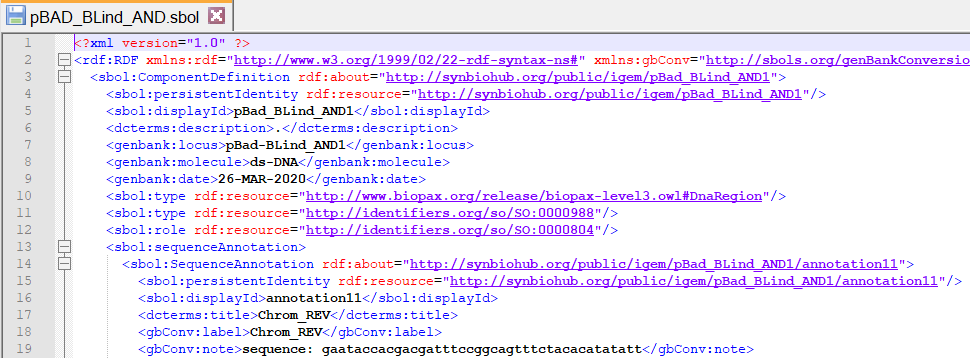

   * export the linear and circular plasmid map in .png from the GenBank file
   * Use __*export_PlasmidMap*__ function

In [4]:
path2 = os.path.join(f, "plasmid_linear.png") # store the linear plasmid map to the tempdir
path3 = os.path.join(f, "plasmid_circular.png")  # store the circular plasmid map to the tempdir

# stdconv.export_PlasmidMap(gbpath) # if the path is not provided, the images will be stored to the existing path
stdconv.export_plasmidmap(gbpath, (path2, path3))

'pBad-BLind_AND1'

* The output circular plasmid map is shown as follows: 
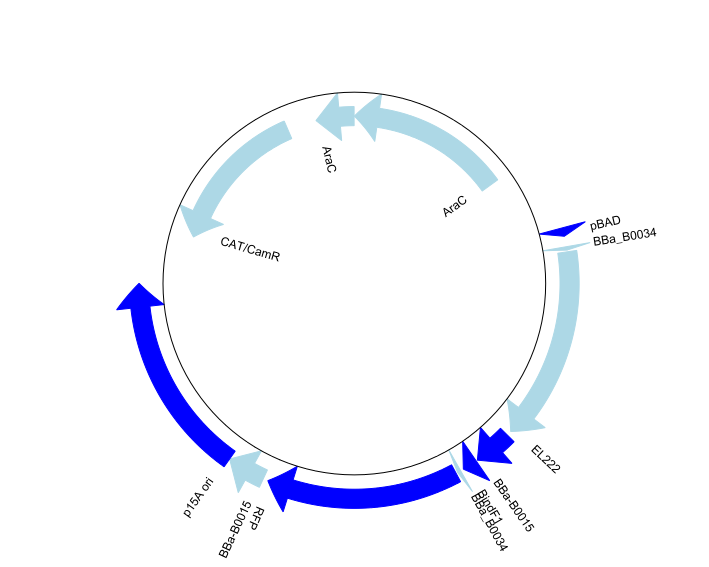

### 2. Use the *class SimpleDNAplot* to generate the SBOL-compliant gene circuit diagram:
   * create an object from the *class* __*SimpleDNAplot*__
   * provide the *Input* in the form of string in a proper sequence separated by a space. For each of the part, provide part type followed by color and part name. Default black color will be used if no color is provided.  
   * Provide the *Regulations* in the form of "from part->to part" followed by the type of regulation, and color (optional) 

part_length ['c0', 'p0', 'p1', 'r0', 'c1', 't0', 'p2', 'r1', 'c2', 't1', 'o0']


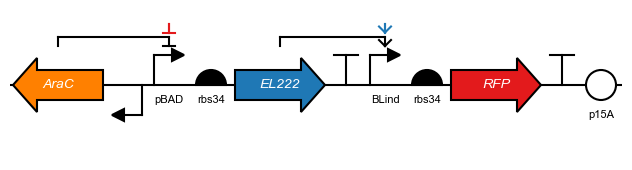

In [5]:
simplot = stdgen.SimpleDNAplot()

Input = '-c.orange.AraC -p p.pBAD r.rbs34 c.blue.EL222 t p.BLind r.rbs34 c.red.RFP t o.p15A'
Regulations = 'c0->p1.Repression p1->p1.Derepression.red c1->p2.Activation p2->p2.Activation2.blue'

figurepath = os.path.join(f, "ANDgate_circuitplot.png") # save the image to the tempdir
maxdnalength, figure = simplot.plot_circuit(Input, Regulations, figurepath)
figure # show the circuit figure

### 3. Use the *class SBMLgen* to generate the SBML model file:
* Based on the SBOL circuit, a model can be generated and encoded in a SBML file. Here shown an example how one can make use of the SBMLgen module to generate the SBML file to encode the model in the form of ordinary differential equations (ODEs). In this example, we are using a model generated by BioModel Selection System (BMSS) after fitting to the characterization data, obtained from the constructed AND gate genetic circuit.    

In [6]:
''' To generate the sbml file'''
sbmlgen = stdgen.SBMLgen()

### ODEs
dmRNA1dt = "Kleak1 + syn_mRNA1*(state1) - (deg_mRNA *mRNA1)"
dPep1dt = "(syn_Pep*mRNA1) - (deg_Pep*Pep1)"
dmRNA2dt = "syn_mRNA2*(state2) - (deg_mRNA *mRNA2)"
dPep2dt = "(syn_Pep*mRNA2) - (deg_Pep*Pep2)"
dmRNA3dt = "Kleak+ (syn_mRNA3*(Pep1/Pep1max)*(Pep2/Pep2max))-(deg_mRNA * mRNA3)"
dPep3dt = "(syn_Pep*mRNA3)-(deg_Pep*Pep3)"

ODE = [dmRNA1dt, dPep1dt, dmRNA2dt, dPep2dt, dmRNA3dt, dPep3dt]
variable = ["mRNA1", "Pep1", "mRNA2", "Pep2", "mRNA3", "Pep3"]
Init = [0]*6
paramName = ["syn_mRNA1", "syn_mRNA2", "syn_mRNA3", "syn_Pep", "deg_Pep",
             "Pep1max", "Pep2max", "Kleak", "Kleak1", "deg_mRNA",
             "state1", "state2"]
param = [7.58e-06, 7.20e-06, 8.76e-06, 2.07e-05, 5.38e-3,
         4.87e-10, 1.11e-05, 8.96e-06, 2.08e-06, 0.1386,
         1, 1]
ParamUnits = ['molL-1min-1', 'molL-1min-1', 'molL-1min-1', 'min-1', 'min-1',
              'molL-1', 'molL-1', 'molL-1min-1', 'molL-1min-1', 'min-1',
              'dimensionless', 'dimensionless']

path4 = os.path.join(f, 'ANDgate_sbml.xml') # store the generated sbml file into tempdir

sbml = sbmlgen.export_sbml(ODE, variable, Init, paramName, param, ParamUnits, outputfile=path4)
print(sbml)

<?xml version="1.0" encoding="UTF-8"?>
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model substanceUnits="mole" timeUnits="second" extentUnits="mole">
    <listOfUnitDefinitions>
      <unitDefinition id="per_second">
        <listOfUnits>
          <unit kind="second" exponent="-1" scale="0" multiplier="1"/>
        </listOfUnits>
      </unitDefinition>
      <unitDefinition id="per_min">
        <listOfUnits>
          <unit kind="second" exponent="-1" scale="0" multiplier="60"/>
        </listOfUnits>
      </unitDefinition>
      <unitDefinition id="molperLmin">
        <listOfUnits>
          <unit kind="mole" exponent="1" scale="0" multiplier="1"/>
          <unit kind="litre" exponent="-1" scale="0" multiplier="1"/>
          <unit kind="second" exponent="-1" scale="0" multiplier="60"/>
        </listOfUnits>
      </unitDefinition>
      <unitDefinition id="molperL">
        <listOfUnits>
          <unit kind="mole" exponent="1" scale="

### 4. Use the *class SEDMLOMEXgen* to generate the SEDML file and the OMEX archive:
* combining the input from SBML file, one can then execute the OMEX file for simulations

In [7]:
omexgen = stdgen.SEDMLOMEXgen()

#matplotlib.use("Qt5Agg") # to show the output simulation figure
sbmlfile = "ANDgate_sbml.xml"
sbmlpath = os.path.join(path0, "files", sbmlfile)

phrasedml_str = """
      model1 = model "{}"
      sim1 = simulate uniform(0, 720, 1000)
      sim1.algorithm = rk4
      state_11 = run sim1 on model1
      model2 = model model1 with state1 = 1, state2 = 0
      state_10 = run sim1 on model2
      model3 = model model1 with state1 = 0, state2 = 1
      state_01 = run sim1 on model3
      model4 = model model1 with state1 = 0, state2 = 0
      state_00 = run sim1 on model4
      plot "AND gate Model Simulations" state_11.time vs state_11.Pep3, \
      state_10.Pep3, state_01.Pep3, state_00.Pep3
    """

antimony_str = omexgen.sbmltoantimony(sbmlpath)
print(antimony_str)

// Created by libAntimony v2.12.0.3
model *ANDgate_sbml()

  // Compartments and Species:
  compartment c1;
  species $mRNA1 in c1, $Pep1 in c1, $mRNA2 in c1, $Pep2 in c1, $mRNA3 in c1;
  species $Pep3 in c1;

  // Rate Rules:
  mRNA1' = Kleak1 + syn_mRNA1*state1 - deg_mRNA*mRNA1;
  Pep1' = syn_Pep*mRNA1 - deg_Pep*Pep1;
  mRNA2' = syn_mRNA2*state2 - deg_mRNA*mRNA2;
  Pep2' = syn_Pep*mRNA2 - deg_Pep*Pep2;
  mRNA3' = Kleak + syn_mRNA3*(Pep1/Pep1max)*(Pep2/Pep2max) - deg_mRNA*mRNA3;
  Pep3' = syn_Pep*mRNA3 - deg_Pep*Pep3;

  // Species initializations:
  mRNA1 = 0;
  mRNA1 has molperL;
  Pep1 = 0;
  Pep1 has molperL;
  mRNA2 = 0;
  mRNA2 has molperL;
  Pep2 = 0;
  Pep2 has molperL;
  mRNA3 = 0;
  mRNA3 has molperL;
  Pep3 = 0;
  Pep3 has molperL;

  // Compartment initializations:
  c1 = 1;
  c1 has litre;

  // Variable initializations:
  Kleak1 = 2.08e-06;
  Kleak1 has molperLmin;
  syn_mRNA1 = 7.58e-06;
  syn_mRNA1 has molperLmin;
  state1 = 1;
  state1 has Dimension_le;
  deg_mRNA = 0

#### To generate the SEDML file: 

In [8]:
path5 = os.path.join(f, "sedml.xml")
sedml_str = omexgen.phrasedmltosedml(phrasedml_str, sbmlpath, outputfile=path5)
print(sedml_str)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.0.10 with libSBML version 5.18.1. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version3" level="1" version="3">
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="720" numberOfPoints="1000">
      <algorithm kisaoID="KISAO:0000032"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-1" source="C:\Users\jingwui\Dropbox\Post_doc_Documents\git_synbiopython_revised\SynBioPython\examples\files\ANDgate_sbml.xml"/>
    <model id="model2" language="urn:sedml:language:sbml.level-3.version-1" source="model1">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='state1']/@value" newValue="1"/>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='state2']/@value" newVa

#### To directly generate the SEDML file and the OMEX archive: 

The output file path:  C:\Users\jingwui\AppData\Local\Temp\archive.omex
// Created by libAntimony v2.12.0.3
model *ANDgate_sbml()

  // Compartments and Species:
  compartment c1;
  species $mRNA1 in c1, $Pep1 in c1, $mRNA2 in c1, $Pep2 in c1, $mRNA3 in c1;
  species $Pep3 in c1;

  // Rate Rules:
  mRNA1' = Kleak1 + syn_mRNA1*state1 - deg_mRNA*mRNA1;
  Pep1' = syn_Pep*mRNA1 - deg_Pep*Pep1;
  mRNA2' = syn_mRNA2*state2 - deg_mRNA*mRNA2;
  Pep2' = syn_Pep*mRNA2 - deg_Pep*Pep2;
  mRNA3' = Kleak + syn_mRNA3*(Pep1/Pep1max)*(Pep2/Pep2max) - deg_mRNA*mRNA3;
  Pep3' = syn_Pep*mRNA3 - deg_Pep*Pep3;

  // Species initializations:
  mRNA1 = 0;
  mRNA1 has molperL;
  Pep1 = 0;
  Pep1 has molperL;
  mRNA2 = 0;
  mRNA2 has molperL;
  Pep2 = 0;
  Pep2 has molperL;
  mRNA3 = 0;
  mRNA3 has molperL;
  Pep3 = 0;
  Pep3 has molperL;

  // Compartment initializations:
  c1 = 1;
  c1 has litre;

  // Variable initializations:
  Kleak1 = 2.08e-06;
  Kleak1 has molperLmin;
  syn_mRNA1 = 7.58e-06;
  syn_mRNA1

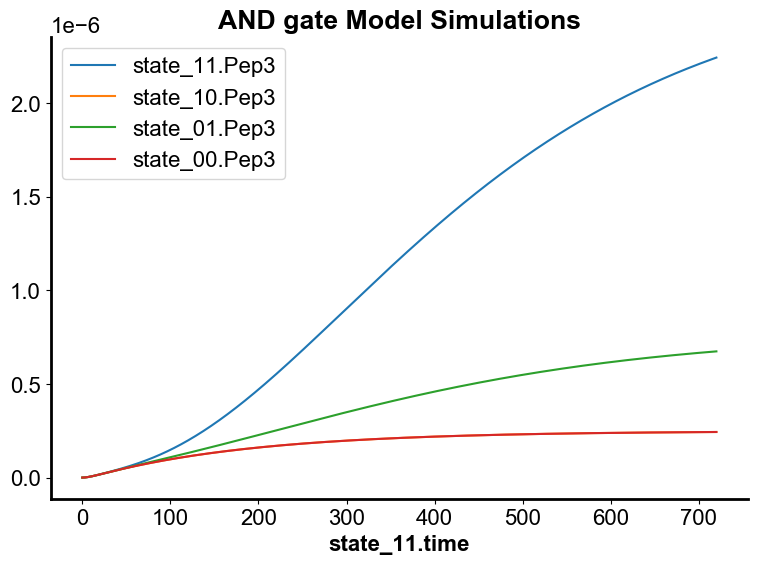

In [9]:
## customize the properties in matplotlib for figure plotting
%matplotlib inline
plt.rcdefaults()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.size"] = 16
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["axes.linewidth"] = 2
plt.rcParams["axes.formatter.limits"] = -3, 3
plt.rcParams["legend.frameon"] = False
params = {"mathtext.default": "regular"}
plt.rcParams.update(params)
plt.rcParams.update({"axes.spines.top": False, "axes.spines.right": False})

path6 = os.path.join(f, "archive.omex")
omex_str = omexgen.export_omex(antimony_str, phrasedml_str, outputfile=path6)
print(omex_str)

omexgen.execute_inlineomex(omex_str)